In [16]:
# EXP_NAME="ViTDCNv2_tuner_config_ML_1M"
EXP_NAME="ViTDCNv2lr_tuner_config_ML_1M"
# EXP_NAME="ViTDCNv2cross_tuner_config_ML_1M"

In [17]:
from itertools import product
import yaml

with open(f'config/{EXP_NAME}.yaml', 'r') as file:
    config = yaml.safe_load(file)
tuner_space = config['tuner_space']
hyperparameters = list(tuner_space.keys())
params = [k for k, v in tuner_space.items() if type(v) == list and len(v) >=2]
hyperparameter_values = []

for hp in hyperparameters:
    value = tuner_space[hp]
    if isinstance(value, list):
        hyperparameter_values.append(value)
    else:
        hyperparameter_values.append([value])

combinations = [dict(zip(hyperparameters, values)) for values in product(*hyperparameter_values)]
combinations[:5]

[{'model_root': './checkpoints/',
  'learning_rate': 0.005,
  'batch_size': 2048,
  'num_cross_layers': 4,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 {'model_root': './checkpoints/',
  'learning_rate': 0.005,
  'batch_size': 2048,
  'num_cross_layers': 3,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 {'model_root': './checkpoints/',
  'learning_rate': 0.005,
  'batch_size': 2048,
  'num_cross_layers': 2,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 {'model_root': './checkpoints/',
  'learning_rate': 0.005,
  'batch_size': 2048,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 {'model_root': './checkpoints/',
  'learning_rate': 0.005,
  'batch_size': 4096,
  'num_cross_layers': 4,
  'ne

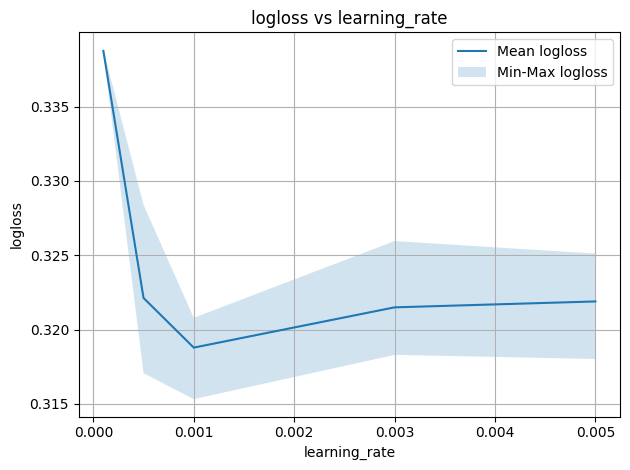

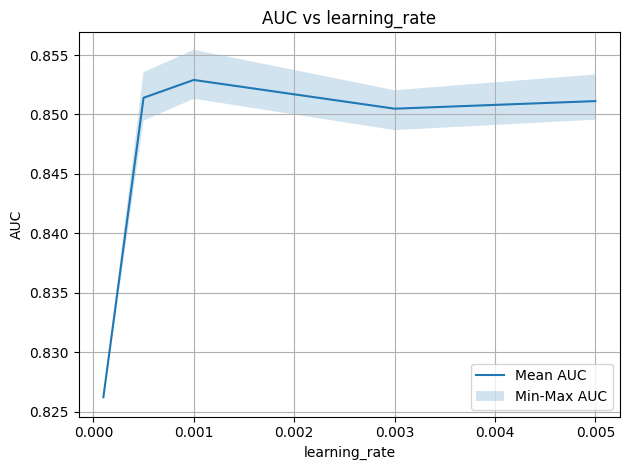

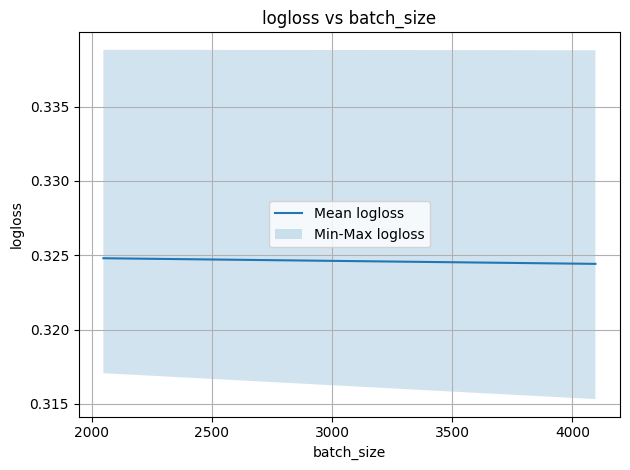

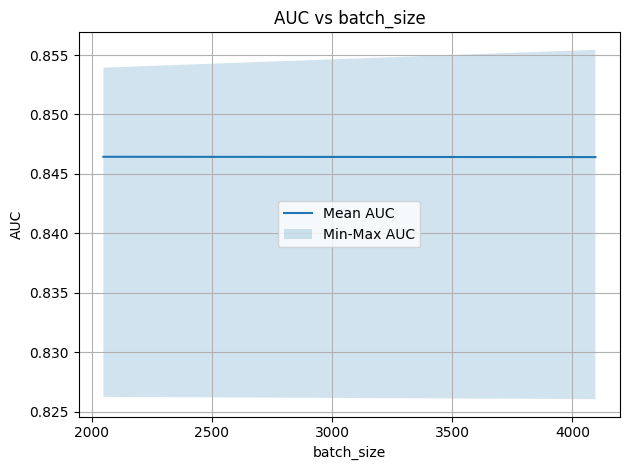

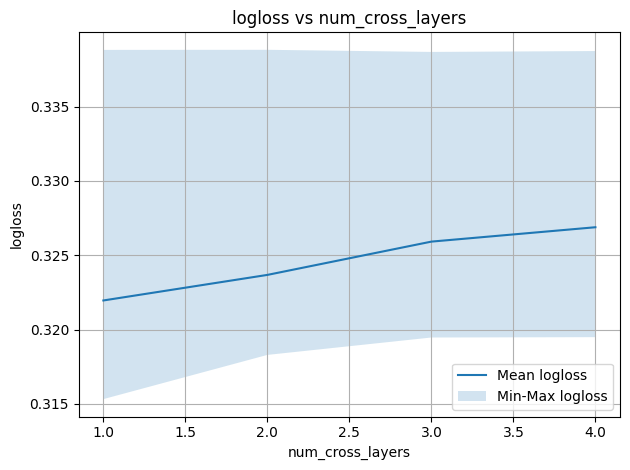

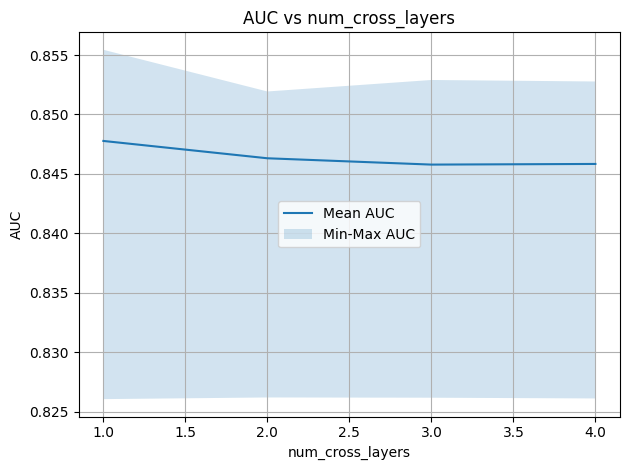

In [18]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            results.append({'logloss': logloss, 'AUC': auc})

num_entries = min(len(combinations), len(results))
aligned_data = []
for i in range(num_entries):
    data_entry = combinations[i].copy()
    data_entry.update(results[i])
    aligned_data.append(data_entry)

metrics = ['logloss', 'AUC']
metrics_per_hyperparam = {}

for hp in params:
    metrics_per_hyperparam[hp] = {}
    for entry in aligned_data:
        value = entry[hp]
        if value not in metrics_per_hyperparam[hp]:
            metrics_per_hyperparam[hp][value] = {metric: [] for metric in metrics}
        for metric in metrics:
            metrics_per_hyperparam[hp][value][metric].append(entry[metric])

# Step 5: Compute min, max, mean for each hyperparameter value
stats_per_hyperparam = {}

for hp, values in metrics_per_hyperparam.items():
    stats_per_hyperparam[hp] = {}
    for value, metrics_dict in values.items():
        stats_per_hyperparam[hp][value] = {}
        for metric, metric_values in metrics_dict.items():
            data = np.array(metric_values)
            stats_per_hyperparam[hp][value][metric] = {
                'min': data.min(),
                'max': data.max(),
                'mean': data.mean()
            }

# Step 6: Plot the results
for hp in params:
    values_stats = sorted(stats_per_hyperparam[hp].items(), key=lambda x: x[0])
    values = [v for v, _ in values_stats]
    for metric in metrics:
        metric_mean = [stats[metric]['mean'] for _, stats in values_stats]
        metric_min = [stats[metric]['min'] for _, stats in values_stats]
        metric_max = [stats[metric]['max'] for _, stats in values_stats]

        plt.figure()
        plt.plot(values, metric_mean, label=f'Mean {metric}')
        plt.fill_between(values, metric_min, metric_max, alpha=0.2, label=f'Min-Max {metric}')
        plt.xlabel(hp)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {hp}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        # plt.savefig(f'{metric}_vs_{hp}.png')
        plt.close()


In [19]:
auc_lst = [item["AUC"] for item in results]
combinations[auc_lst.index(max(auc_lst))], max(auc_lst)

({'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 0.855438)

In [20]:
logloss_lst = [item["logloss"] for item in results]
combinations[logloss_lst.index(min(logloss_lst))], min(logloss_lst)

({'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 0.315323)

In [21]:
results

[{'logloss': 0.325109, 'AUC': 0.849561},
 {'logloss': 0.322489, 'AUC': 0.850896},
 {'logloss': 0.319856, 'AUC': 0.851516},
 {'logloss': 0.318023, 'AUC': 0.853368},
 {'logloss': 0.324621, 'AUC': 0.850504},
 {'logloss': 0.324029, 'AUC': 0.85012},
 {'logloss': 0.322313, 'AUC': 0.85107},
 {'logloss': 0.318687, 'AUC': 0.851961},
 {'logloss': 0.325951, 'AUC': 0.848899},
 {'logloss': 0.324847, 'AUC': 0.848683},
 {'logloss': 0.322327, 'AUC': 0.850442},
 {'logloss': 0.319289, 'AUC': 0.852042},
 {'logloss': 0.319489, 'AUC': 0.850507},
 {'logloss': 0.32307, 'AUC': 0.850073},
 {'logloss': 0.318296, 'AUC': 0.85143},
 {'logloss': 0.31868, 'AUC': 0.851823},
 {'logloss': 0.320264, 'AUC': 0.852774},
 {'logloss': 0.319466, 'AUC': 0.8529},
 {'logloss': 0.318317, 'AUC': 0.851934},
 {'logloss': 0.317301, 'AUC': 0.853939},
 {'logloss': 0.320789, 'AUC': 0.852735},
 {'logloss': 0.319902, 'AUC': 0.852188},
 {'logloss': 0.318927, 'AUC': 0.851323},
 {'logloss': 0.315323, 'AUC': 0.855438},
 {'logloss': 0.328385, 

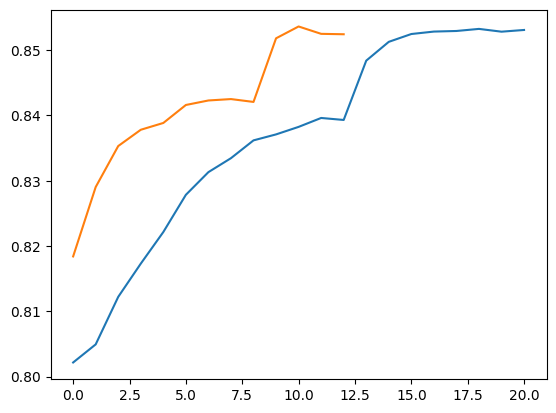

In [22]:
import matplotlib.pyplot as plt
import numpy as np

vits = [
    0.802154, 0.804925, 0.812207, 0.817295, 0.822139, 0.827837, 0.831312, 0.833450, 0.836177, 0.837092, 0.838243, 0.839610, 0.839304, 0.848389, 0.851271, 0.852469, 0.852843, 0.852934, 0.853253, 0.852827, 0.853089
]

dcnv2 = [
    0.818400, 0.829029, 0.835310, 0.837802, 0.838844, 0.841598, 0.842289, 0.842503, 0.842066, 0.851811, 0.853624, 0.852496, 0.852433
]

plt.plot(np.arange(len(vits)), vits)
plt.plot(np.arange(len(dcnv2)), dcnv2)